In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

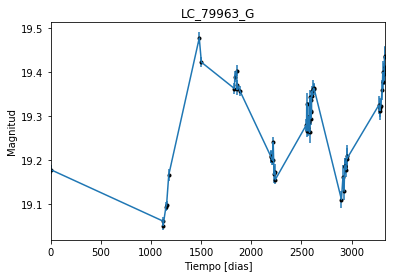

In [2]:
data = np.genfromtxt('LC_79963_G.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_79963_G')
plt.savefig("LC_79963_G.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

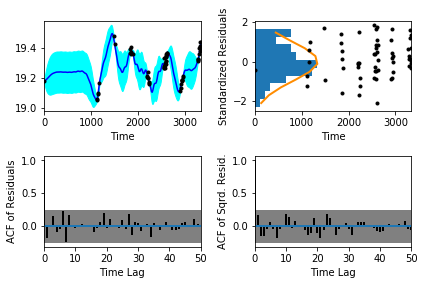

In [5]:
sample.assess_fit()

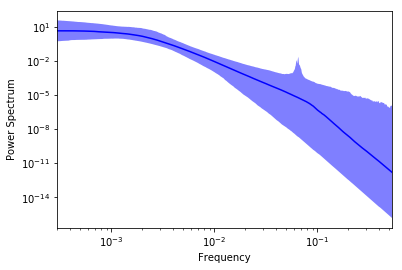

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

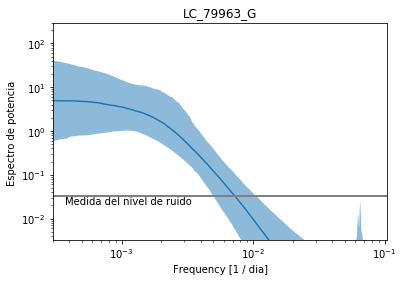

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_79963_G')
plt.savefig("Medida del nivel de ruido_G.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_79963_G')

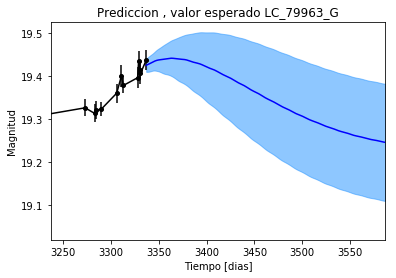

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_79963_G')

Text(0.5,1,'Prediccion, Caminos simulados_LC_79963_G')

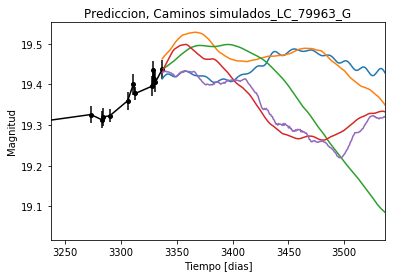

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_79963_G')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


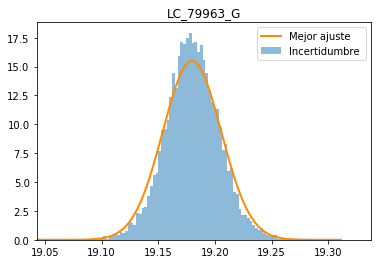

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_79963_G')
plt.savefig("Mejor_ajuste_LC_79963_G.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_79963_G')

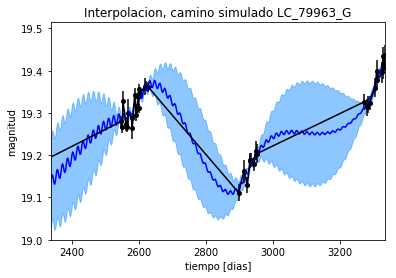

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_79963_G')

Text(0.5,1,'Interpolacion, camino simulado LC_79963_G')

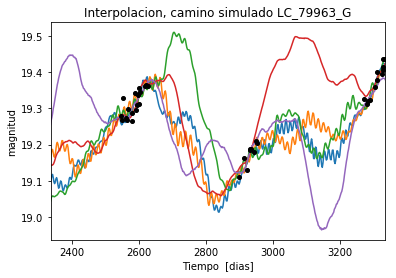

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_79963_G')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 1528.77572931
Median: 0.00442414255758
Standard deviation: 0.180658559111
68% credibility interval: [ 0.00053196  0.12186117]
95% credibility interval: [  3.36085726e-04   7.23436675e-01]
99% credibility interval: [  3.07939532e-04   9.94876765e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 488.775787198
Median: 0.00177315812187
Standard deviation: 0.0633543835924
68% credibility interval: [ 0.00048763  0.01981071]
95% credibility interval: [ 0.00032827  0.1923245 ]
99% credibility interval: [  3.04384276e-04   4.39565579e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 538.746632355
Median: 0.00331372344533
Standar

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 109.353371953
Median: 148.826464907
Standard deviation: 2.80303121502
68% credibility interval: [ 146.72839556  151.76052616]
95% credibility interval: [ 144.11802866  155.45831779]
99% credibility interval: [ 141.82396931  156.93174134]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 614.22182628
Median: 0.181477770508
Standard deviation: 1.82429573376
68% credibility interval: [ 0.03006803  2.50377332]
95% credibility interval: [ 0.0143564   6.36245096]
99% credibility interval: [ 0.01117354  8.88016552]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 530.107703373
Median: 0.210566072362
Standard deviation: 7.87621078576
68% credibility interval: [ 0.05021861  6.0370552 ]
95% credibility interval: [  1.46941391e-03

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 1.37737089023e+32
Median: 1.29927764322e-26
Standard deviation: 1.87604793444e+90
68% credibility interval: [  2.05507251e-61   5.19693504e-02]
95% credibility interval: [  1.10049711e-144   5.72715021e+049]
99% credibility interval: [  3.04897304e-158   4.38294194e+055]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 3442.93888842
Median: 19.2668551477
Standard deviation: 0.0630223294294
68% credibility interval: [ 19.21350672  19.31506619]
95% credibility interval: [ 19.1293353   19.38716803]
99% credibility interval: [ 19.05410157  19.46977271]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 282.914021563
Median: 0.0627903098788
Standard deviation: 0.229315977744
68% credibility interval: [ 0.          0.32159752]
95% credibility interval: [ 0.         0.8567923]
99% credibility interval: [ 0.         1.0219539]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 282.914021563
Median: 0.0627903098788
Standard deviation: 0.229315977744
68% credibility interval: [ 0.          0.32159752]
95% credibility interval: [ 0.         0.8567923]
99% credibility interval: [ 0.         1.0219539]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 309.755192424
Median: 0.0
Standard deviation: 0.000926882377946
68% credibilit

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 109.353371953
Median: 148.826464907
Standard deviation: 2.80303121502
68% credibility interval: [ 146.72839556  151.76052616]
95% credibility interval: [ 144.11802866  155.45831779]
99% credibility interval: [ 141.82396931  156.93174134]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1049.36780086
Median: 0.0214294744144
Standard deviation: 0.0259688158255
68% credibility interval: [ 0.01262924  0.03963123]
95% credibility interval: [ 0.00753163  0.08373275]
99% credibility interval: [ 0.00623338  0.16034634]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 872.346061853
Median: 1.14351333711
Standard deviation: 0.21181516035
68% credibility interval: [ 0.93738698  1.36350775]
95% credibility interval: [ 0.80131144  1.61974653]
99% credibility interval: [ 0.71831853  1.79073374]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 1386.36155108
Median: 9.38620616549e-05
Standard deviation: 0.0356857639514
68% credibility interval: [  5.42594854e-06   2.54121267e-03]
95% credibility interval: [  8.42357977e-54   1.72289916e-02]
99% credibility interval: [  2.12263899e-59   1.19252445e-01]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 1528.77572931
Median: (-0.0277977075146-1.02327270207j)
Standard deviation: 1.83425252219
68% credibility interval: [-0.76567634-0.86377649j -0.00334240-0.41446152j]
95% credibility interval: [ -4.54548669e+00+0.j          -2.11168890e-03-0.02448245j]
99% credibility interval: [ -6.25099507e+00+0.j          -1.93484114e-03-0.40834553j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 488.775787198
Median: (-0.0111410810587+0.429472238893j)
Standard deviation: 1.49481185107
68% credibility interval: [-0.12447437+0.10318678j -0.00306389+0.41115168j]
95% credibility interval: [-1.20841044 +5.24740916e+00j -0.00206257 +2.34244057e-04j]
99% credibility interval: [ -2.76187199e+00+2.16934201j  -1.91250281e-03+0.00456428j]
Pos